In [1]:
import jax
import jax.numpy as np

import numpy as onp

from typing import Any, Callable
from jaxtyping import Array

import equinox as eqx

import matplotlib.pyplot as plt

In [2]:
key = jax.random.PRNGKey(0)

In [3]:
N = 10

#define set of random positions in 2d

key, subkey = jax.random.split(key)
pos = np.sort(10*jax.random.uniform(key, (N,)))
pos = np.stack((pos, np.zeros_like(pos)), axis=1)

In [4]:
#define chemical degradations and update laplacian
K = .1

#diffusion coefficient
D = 2e-2

#define random production rates from exponential distribution
#P = jax.random.uniform(key, (N,))
P = np.zeros(N).at[N-1].set(10)
P = P.at[0].set(5)


In [5]:
def ss_chemfield(pos, D, K, P):
    """
    Calculate the steady state chemical field for a given set of positions and parameters

    Parameters
    ----------
    pos : array
        Nx2 array of positions
    D : float
        Diffusion coefficient
    K : float
        Decay rate
    P : array
        Nx1 array of production rates

    Returns
    -------
    x : array
        Nx1 array of steady state concentrations
    """

    N = pos.shape[0]

    #calculate all pairwise distances using pure jax
    dists = np.sqrt(np.sum((pos[:, None, :] - pos[None, :, :])**2, axis=-1)) + np.diag(np.ones(N))

    #adjacency matrix
    diag_mask = np.ones((N, N)) - np.eye(N)
    A = (diag_mask)*(1/dists)**2

    #graph laplacian
    L = np.diag(np.sum(A, axis=0)) - A

    #update laplacian
    L = D*L + K*np.eye(N)

    #solve for steady state
    x = np.linalg.solve(L, P)

    return x

In [6]:
x = ss_chemfield(pos, D, K, P)

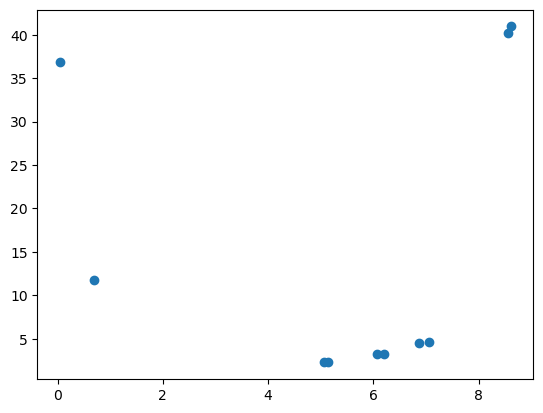

In [7]:
plt.plot(pos[:, 0], x, 'o')

In [73]:

N = 50

D = 5
K = .001

key, *subkeys = jax.random.split(key, 3)
X = np.sort(10*jax.random.uniform(subkeys[0], (N,)))
Y = np.sort(10*jax.random.uniform(subkeys[1], (N,)))
X, Y = np.meshgrid(X, Y)

key, subkey = jax.random.split(key)
P = 1*jax.random.bernoulli(subkey, .1, (N,N)).flatten()


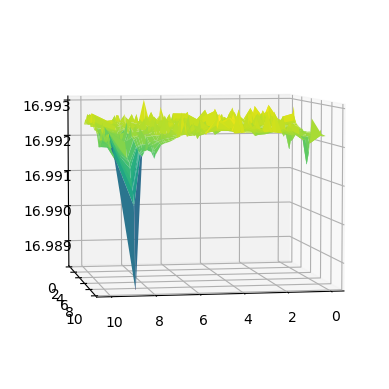

In [74]:


# Create a new figure
fig = plt.figure()

# Add 3D subplot
ax = fig.add_subplot(111, projection='3d')

# Define data for X, Y, Z



Z = ss_chemfield(np.stack((X.flatten(), Y.flatten()), axis=1), D, K, P).reshape(X.shape)


# Plot a 3D surface
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')

#rotate the axes and update
ax.view_init(5, 80)

# # Show the plot
plt.show()